# Лабораторная работа №4: Частотный анализ формул численного интегрирования

Выполнили студенты гр. 2383 Борисов Иван Вадимович и Сыздыков Нургалым Конакбаевич. Вариант №8.

## Цель работы

Провести анализ частотных характеристик известных формул численного интегрирования.

## Основные теоретические положения

Формула прямоугольников:

$$y_{n+1} = y_n + x_{n+\frac{1}{2}}, \quad y_0 = 0$$

Формула трапеций:

$$y_{n+1} = y_n + \frac{1}{2} (x_{n} + x_{n+1}), \quad y_0 = 0$$

Формула Симпсона:

$$y_{n+1} = y_{n-1} + \frac{1}{3} (x_{n-1} + 4x_{n} + x_{n+1}), \quad y_0 = 0$$

Формула для интегрирования по «правилу 3/8»:

$$y_{n+2} = y_{n-1} + \frac{1}{8} (x_{n+2} + 3 x_{n+1} + 3 x_n + x_{n-1})$$

Связь передаточной функции для круговой частоты и циклической:

$$H(w) = H(2 \pi f) = \tilde H(f)$$

Отношение значений (оценка точности):

$$\gamma = \frac{Вычисленное}{Точное}$$


## Постановка задачи

Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для различных квадратурных формул и построить графики $\tilde H(f)$. Проинтерпретировать частотные свойства передаточных функций. Получить формулы для передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам Ньютона-Котеса различного порядка. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных квадратурных формул.

## Выполнение работы

Пункты работы выполняются с помощью кода.

In [19]:
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt


plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

## Задание 1
Вывести формулы передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам прямоугольников, трапеций и Симпсона. Построить графики передаточных функций и графики отношения вычисляемого в результате фильтрации значения к истинному. Проинтерпретировать частотные свойства полученных передаточных функций.

### 1.1. Квадратурная формула прямоугольников
Разностное уравнение:
$$y_{n+1} = y_n + x_{n+\frac{1}{2}}$$
$$ x_n = e^{i\omega n} \text{ входной сигнал, } y_n = H(\omega) e^{i\omega n} $$
$$ H(\omega)e^{i\omega(n+1)} = H(\omega)e^{i\omega n} + e^{i\omega(n+\frac{1}{2})} $$
Делим на  $e^{i\omega n}$:
$$H(\omega)e^{i\omega} = H(\omega) + e^{i\omega/2} $$
$$H(\omega)(e^{i\omega} - 1) = e^{i\omega/2} $$
$$H(\omega) = \frac{e^{i\omega/2}}{e^{i\omega} - 1} = \frac{e^{i\omega/2}}{e^{i\omega/2}(e^{i\omega/2} - e^{-i\omega/2})} = \frac{1}{2i \sin(\omega/2)}$$
* **Передаточная функция $H(\omega)$:**
    $$H(\omega) = \frac{1}{2i \sin(\omega/2)}$$
* **Точное значение интеграла $e^{i \omega n}$:**
$$y^* = \frac{e^{i\omega n}}{\omega i}$$
* **Отношение значений $\gamma$:**
    $$\gamma = \frac{\text{Вычисленное}}{\text{Точное}}= \frac{i\omega}{2i \sin(\omega/2)} = \frac{\omega/2}{\sin(\omega/2)}$$

### 1.2. Квадратурная формула трапеций
Разностное уравнение: $$y_{n+1} = y_n + \frac{1}{2}(x_n + x_{n+1})$$
$$ x_n = e^{i\omega n} \text{ входной сигнал, } y_n = H(\omega) e^{i\omega n} $$
$$H(\omega)e^{i\omega(n+1)} = H(\omega)e^{i\omega n} + \frac{1}{2}(e^{i\omega n} + e^{i\omega(n+1)}) $$
$$\text{Делим на } e^{i\omega n}: \quad H(\omega)e^{i\omega} = H(\omega) + \frac{1}{2}(1 + e^{i\omega}) $$
$$H(\omega)(e^{i\omega} - 1) = \frac{1}{2}(1 + e^{i\omega}) $$

$$H(\omega) = \frac{1 + e^{i\omega}}{2(e^{i\omega} - 1)} $$
$$H(\omega) = \frac{e^{i\omega/2}(e^{-i\omega/2} + e^{i\omega/2})}{2 \cdot e^{i\omega/2}(e^{i\omega/2} - e^{-i\omega/2})} = \frac{2 \cos(\omega/2)}{4i \sin(\omega/2)}$$

* **Передаточная функция $H(\omega)$:**
    $$H(\omega) = \frac{\cos(\omega/2)}{2i \sin(\omega/2)}$$
* **Точное значение интеграла $e^{i \omega n}$:**
$$y^* = \frac{e^{i\omega n}}{\omega i}$$
* **Отношение значений $\gamma$:**
    $$\gamma = \frac{\text{Вычисленное}}{\text{Точное}} = \frac{\omega \cos(\omega/2)}{2 \sin(\omega/2)}$$

### 1.3. Квадратурная формула Симпсона
Разностное уравнение:
$$y_{n+1} = y_{n-1} + \frac{1}{3}(x_{n-1} + 4x_n + x_{n+1})$$

$$x_n = e^{i\omega n} \text{ входной сигнал, } y_n = H(\omega) e^{i\omega n}$$

$$H(\omega)e^{i\omega(n+1)} = H(\omega)e^{i\omega(n-1)} + \frac{1}{3}(e^{i\omega(n-1)} + 4e^{i\omega n} + e^{i\omega(n+1)})$$
Делим на $e^{i\omega n}$:

$$H(\omega)e^{i\omega} = H(\omega)e^{-i\omega} + \frac{1}{3}(e^{-i\omega} + 4 + e^{i\omega})$$

$$H(\omega)(e^{i\omega} - e^{-i\omega}) = \frac{1}{3}(4 + e^{i\omega} + e^{-i\omega})$$

$$H(\omega)(2i \sin(\omega)) = \frac{1}{3}(4 + 2 \cos(\omega))$$

$$H(\omega) = \frac{4 + 2 \cos(\omega)}{6i \sin(\omega)}$$

* **Передаточная функция $H(\omega)$:**
    $$H(\omega) = \frac{2 + \cos(\omega)}{3i \sin(\omega)}$$
* **Точное значение интеграла $e^{i \omega n}$:**
$$y^* = \frac{e^{i\omega n}}{\omega i}$$
* **Отношение значений $\gamma$:**
    $$\gamma = \frac{\text{Вычисленное}}{\text{Точное}}= \frac{i\omega (2 + \cos(\omega))}{3i \sin(\omega)} = \frac{\omega(2 + \cos(\omega))}{3 \sin(\omega)}$$

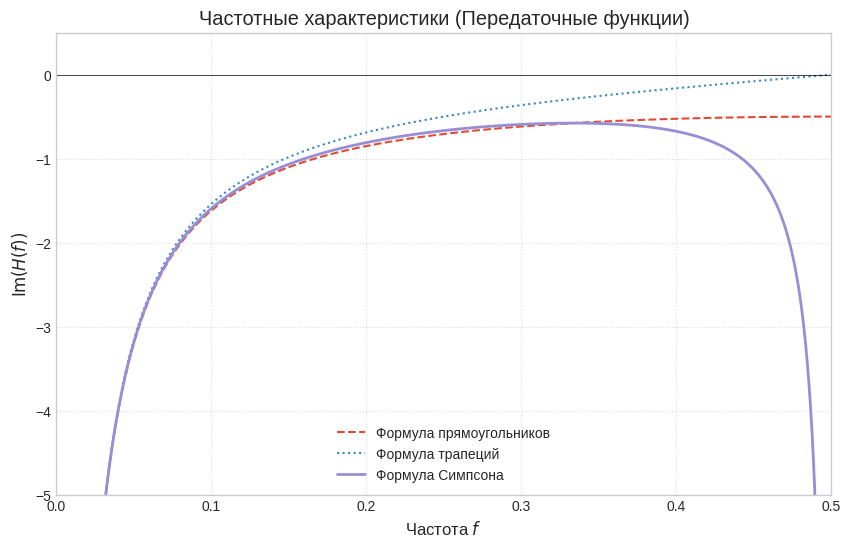

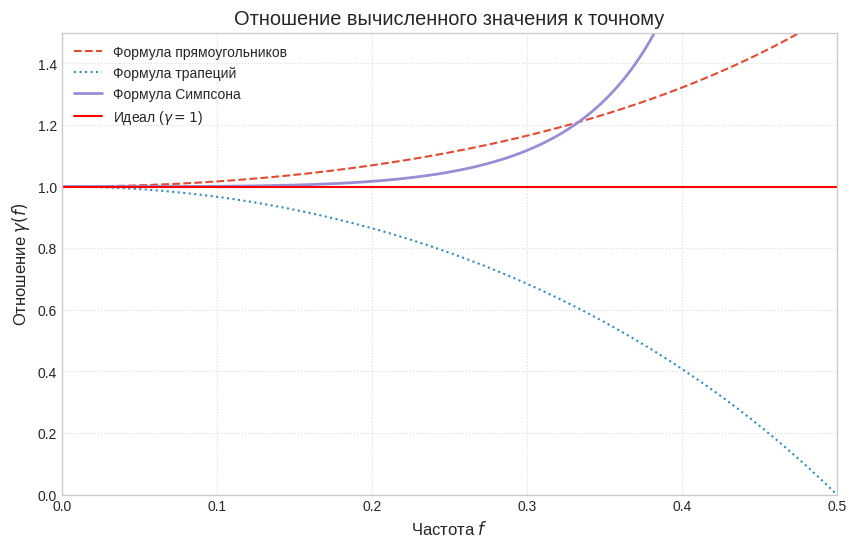

In [22]:
f: npt.NDArray[np.float64] = np.linspace(0.0001, 0.5, 1000)
omega: npt.NDArray[np.float64] = 2 * np.pi * f

H_rect: npt.NDArray[np.complex128] = 1 / (2j * np.sin(omega / 2))
H_trap: npt.NDArray[np.complex128] = np.cos(omega / 2) / (2j * np.sin(omega / 2))
H_simp: npt.NDArray[np.complex128] = (2 + np.cos(omega)) / (3j * np.sin(omega))

plt.figure(figsize=(10, 6))
plt.plot(f, np.imag(H_rect), label='Формула прямоугольников', linestyle='--')
plt.plot(f, np.imag(H_trap), label='Формула трапеций', linestyle=':')
plt.plot(f, np.imag(H_simp), label='Формула Симпсона', linewidth=2)

plt.title('Частотные характеристики (Передаточные функции)')
plt.xlabel('Частота $f$')
plt.ylabel(r'$\mathrm{Im}(H(f))$')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.7)
plt.ylim(-5, 0.5)
plt.xlim(0, 0.5)
plt.axhline(0, color='black', linewidth=0.5)
plt.show()


gamma_rect: npt.NDArray[np.float64] = (omega / 2) / np.sin(omega / 2)
gamma_trap: npt.NDArray[np.float64] = (omega * np.cos(omega / 2)) / (2 * np.sin(omega / 2))
gamma_simp: npt.NDArray[np.float64] = (omega * (2 + np.cos(omega))) / (3 * np.sin(omega))


plt.figure(figsize=(10, 6))
plt.plot(f, gamma_rect, label='Формула прямоугольников', linestyle='--')
plt.plot(f, gamma_trap, label='Формула трапеций', linestyle=':')
plt.plot(f, gamma_simp, label='Формула Симпсона', linewidth=2)

plt.axhline(1, color='red', linestyle='-', label=r'Идеал ($\gamma=1$)')

plt.title('Отношение вычисленного значения к точному')
plt.xlabel('Частота $f$')
plt.ylabel(r'Отношение $\gamma(f)$')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.7)
plt.ylim(0, 1.5)
plt.xlim(0, 0.5)
plt.show()

Все три формулы демонстрируют, что $\mathrm{Im}(H(f)) \rightarrow -\infty$ при $f → 0$. Это поведение соответствует идеальному интегратору ($H(\omega)=\frac{1}{i\omega}=−i/\omega$), который должен иметь бесконечное усиление на нулевой частоте. Таким образом, все три метода ведут себя как фильтры нижних частот (ФНЧ), усиливающие низкие частоты.

На втором графике видно, что все три метода сходятся к $\gamma = 1$. Это означает, что для медленно меняющихся сигналов все три формулы обеспечивают высокую точность интегрирования.

Так же по графикам видно, что формула Симпсона обеспечивает лучшую точность среди всех методов. Ее график остается близки к значению $\gamma = 1$ (примерно до $f \approx 0.25$).

На высоких частотах все фильтры сильно подавляют сигнал, причем формула Симпсона подавляет сигнал сильнее остальных.

## Задание 2

Вывести формулу передаточной функции рекурсивного фильтра для интегрирования по «правилу 3/8»:

$$y_{n+2}=y_{n−1}+\frac{1}{8}(x_{n+2}+3x_{n+1}+3x_{n}+x_{n−1})$$

Построить график передаточной функции и график отношения вычисляемого в результате фильтрации значения к истинному. Проинтерпретировать частотные свойства передаточной функции.

Разностное уравнение:
$$y_{n+2} = y_{n-1} + \frac{1}{8}(x_{n+2} + 3x_{n+1} + 3x_n + x_{n-1})$$

$$x_n = e^{i\omega n} \text{ входной сигнал, } y_n = H(\omega) e^{i\omega n}$$

$$H(\omega)e^{i\omega(n+2)} = H(\omega)e^{i\omega(n-1)} + \frac{1}{8}(e^{i\omega(n+2)} + 3e^{i\omega(n+1)} + 3e^{i\omega n} + e^{i\omega(n-1)})$$

Делим на $e^{i\omega n}$:

$$H(\omega)e^{2i\omega} = H(\omega)e^{-i\omega} + \frac{1}{8}(e^{2i\omega} + 3e^{i\omega} + 3 + e^{-i\omega})$$

$$H(\omega)(e^{2i\omega} - e^{-i\omega}) = \frac{1}{8}(e^{2i\omega} + 3e^{i\omega} + 3 + e^{-i\omega})$$

$$H(\omega) = \frac{e^{2i\omega} + 3e^{i\omega} + 3 + e^{-i\omega}}{8(e^{2i\omega} - e^{-i\omega})}$$

$$H(\omega) = \frac{e^{i\omega/2}(e^{1.5i\omega} + 3e^{0.5i\omega} + 3e^{-0.5i\omega} + e^{-1.5i\omega})}{8 e^{i\omega/2}(e^{1.5i\omega} - e^{-1.5i\omega})} = \frac{2\cos(1.5\omega) + 6\cos(0.5\omega)}{8 (2i\sin(1.5\omega))}$$

* **Передаточная функция $H(\omega)$:**
    $$H(\omega) = \frac{\cos(1.5\omega) + 3\cos(0.5\omega)}{8i\sin(1.5\omega)}$$

* **Точное значение интеграла $e^{i \omega n}$:**
$$y^* = \frac{e^{i\omega n}}{\omega i}$$

* **Отношение значений $\gamma$:**
    $$\gamma = \frac{\text{Вычисленное}}{\text{Точное}} = \frac{i\omega(\cos(1.5\omega) + 3\cos(0.5\omega))}{8i\sin(1.5\omega)} = \frac{\omega(\cos(1.5\omega) + 3\cos(0.5\omega))}{8\sin(1.5\omega)}$$

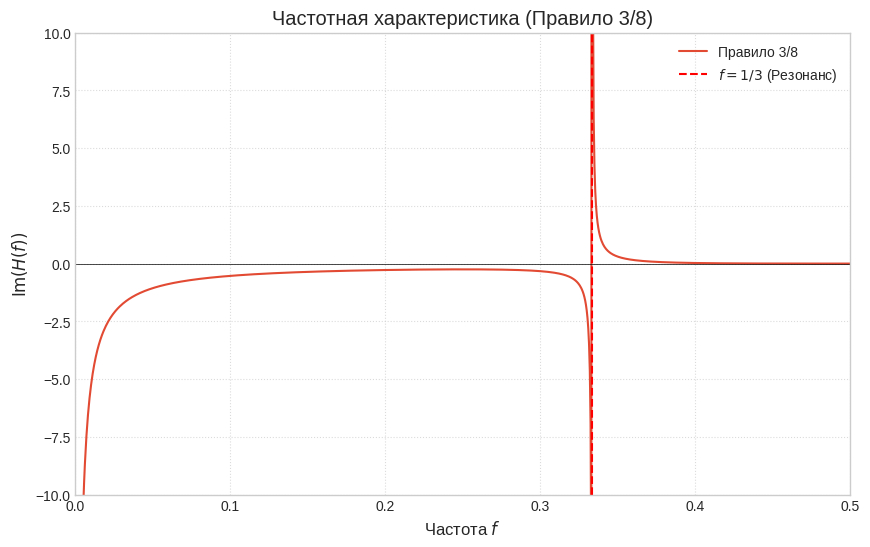

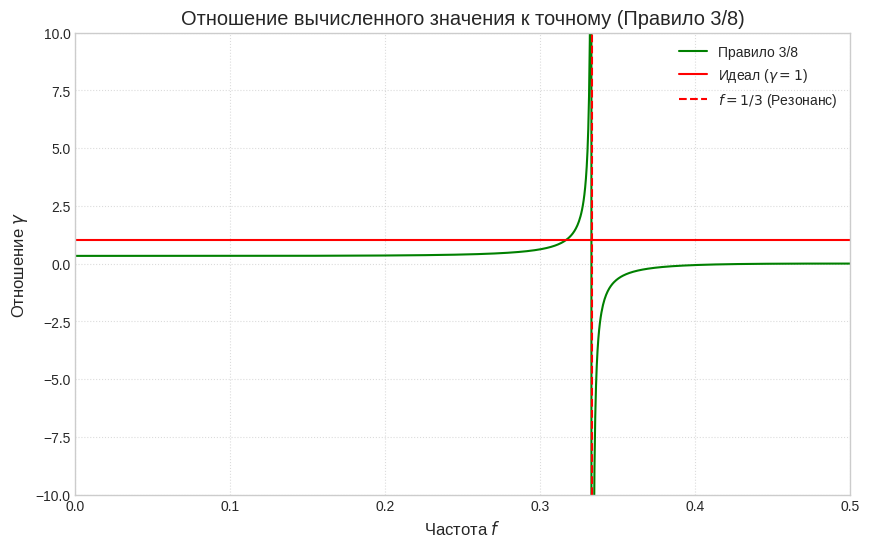

In [27]:
f: npt.NDArray[np.float64] = np.linspace(0.0001, 0.5, 1000)
omega: npt.NDArray[np.float64] = 2 * np.pi * f

H_3_8: npt.NDArray[np.complex128] = (
    (np.cos(1.5 * omega) + 3 * np.cos(0.5 * omega)) /
    (8j * np.sin(1.5 * omega))
)

plt.figure(figsize=(10, 6))
plt.plot(f, np.imag(H_3_8), label='Правило 3/8')
plt.title('Частотная характеристика (Правило 3/8)')
plt.xlabel('Частота $f$')
plt.ylabel(r'$\mathrm{Im}(H(f))$')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.7)
plt.ylim(-10, 10)
plt.xlim(0, 0.5)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(x=1/3, color='red', linestyle='--', label='$f = 1/3$ (Резонанс)')
plt.legend()
plt.show()


gamma_3_8: npt.NDArray[np.float64] = (
    (omega * (np.cos(1.5 * omega) + 3 * np.cos(0.5 * omega))) /
    (8 * np.sin(1.5 * omega))
)

plt.figure(figsize=(10, 6))
plt.plot(f, gamma_3_8, label='Правило 3/8', color='green')
plt.axhline(1, color='red', linestyle='-', label=r'Идеал ($\gamma=1$)')
plt.title('Отношение вычисленного значения к точному (Правило 3/8)')
plt.xlabel('Частота $f$')
plt.ylabel(r'Отношение $\gamma$')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.7)
plt.ylim(-10, 10)
plt.xlim(0, 0.5)
plt.axvline(x=1/3, color='red', linestyle='--', label='$f = 1/3$ (Резонанс)')
plt.legend()
plt.show()

Передаточная функция $\tilde{H}(f)$ показывает, что фильтр является интегратором нижних частот, т.к. его усиление (модуль $\mathrm{Im}(H(f))$) растет при приближении частоты $f$ к нулю.

Однако особенностью этого фильтра является наличие вертикальной асимптоты (резонанса) при нормированной частоте $f = 1/3$. В этой точке $\sin(1.5\omega)$ в знаменателе обращается в ноль, и фильтр усиливает сигналы на этой частоте. Это делает его нестабильным. Так же видно, что рядом с асимптотой происходит усиление сигнала.

## Задание 3

Провести сопоставительный анализ частотных характеристик передаточных функций, полученных при выполнении п. 1 и 2.



Все четыре метода ведут себя как интеграторы нижних частот, демонстрируя бесконечное усиление на частоте $f \to 0$.

Формула прямоугольников, трапеции и формула Симпсона сходятся к $\gamma = 1$ при $f \to 0$. Это означает, что они точны для интегрирования медленно меняющихся сигналов.
Формула Симпсона обеспечивает высокую точность. Ее график $\gamma(f)$ остается  близко к $\gamma = 1$ до $f \approx 0.25$.

Методы прямоугольников, трапеций и Симпсона являются устойчивыми. Они обеспечивают полное подавление сигнала на частоте Найквиста ($f = 0.5$), что помогает фильтровать высокочастотный шум. Метод 3/8 является нестабильным, он имеет резкий резонанс (асимптоту) при $f = 1/3$. Это приводит к бесконечному усилению сигнала на этой частоте.

## Выводы

В ходе выполнения лабораторной работы были выведены формулы передаточных функций $H(\omega)$ и функций отношения точности $\gamma(\omega)$ для четырех рекурсивных фильтров, соответствующих квадратурным формулам: прямоугольников, трапеций, Симпсона и «правила 3/8».

На основе этих формул были построены графики $H(f)$ (частотные характеристики) и $\gamma$ (точность). Так же был проведен сравнительный анализ частотных характеристик всех передаточных функций, полученных при выполнении п. 1 и 2.